In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('weight-height.csv')

In [74]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [75]:
df.isnull().values.any()

False

In [76]:
df.shape 

(10000, 3)

In [77]:
# %pip install PIL


## OUTLAYER REMOVING


<Axes: xlabel='Weight', ylabel='Count'>

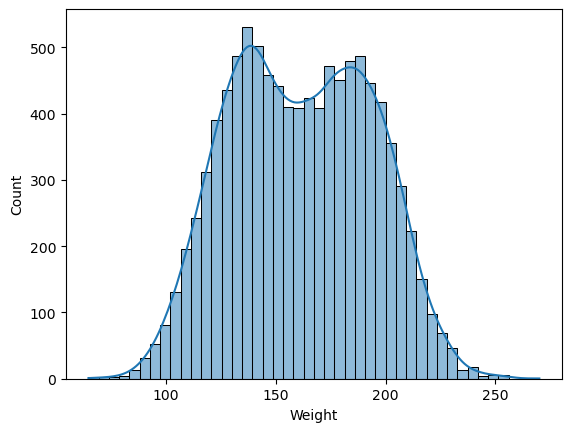

In [78]:

sns.histplot(df.Weight,kde=True)

In [79]:
mean_value = df.Weight.mean()
mean_value

161.44035683283076

In [80]:
std_value = df.Weight.std()
std_value

32.108439006519546

In [81]:
std_3 = mean_value+(2.5*std_value)
std_3

241.7114543491296

In [82]:
neg_std_3 = mean_value-(3*std_value)
neg_std_3

65.11503981327212

In [83]:
df[df['Weight']>std_3]

,Gender,Height,Weight
0,Male,73.847017,241.893563
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741


In [84]:
df[df['Weight']<neg_std_3]

,Gender,Height,Weight
9285,Female,54.263133,64.700127


In [85]:
merge = df[(df['Weight']>std_3) | (df['Weight']<neg_std_3)]

In [86]:
merge.shape

(19, 3)

In [87]:
remove_outlayer_columns = df[(df['Weight']<std_3) & (df['Weight']>neg_std_3)]

In [88]:
remove_outlayer_columns.shape

(9981, 3)

<Axes: xlabel='Weight', ylabel='Count'>

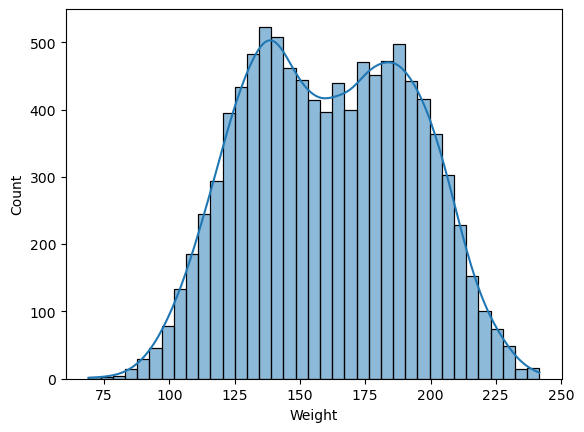

In [89]:
sns.histplot(remove_outlayer_columns.Weight,kde=True)

In [90]:
#One hot Encodig
dummy_variables = pd.get_dummies(remove_outlayer_columns.Gender,drop_first=True,dtype=int)

In [91]:
dummy_variables.head()

,Male
1,1
2,1
3,1
4,1
5,1


In [119]:
## FOR HEIGHT already in Normal distribution

<Axes: xlabel='Height', ylabel='Count'>

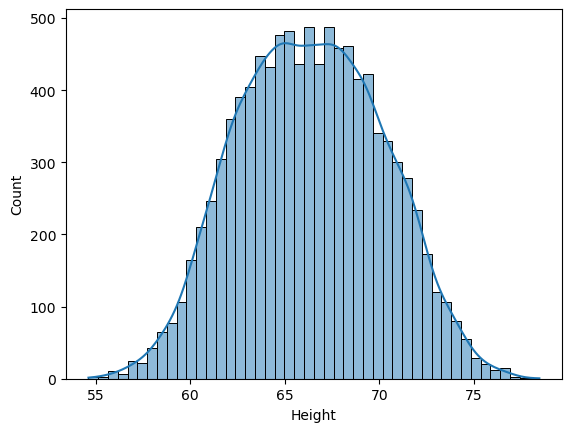

In [118]:
sns.histplot(df.Height,kde=True)

In [92]:
new_df = remove_outlayer_columns.drop('Gender',axis=1)

In [93]:
new_df.head()

,Height,Weight
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156


In [94]:
df = pd.concat([new_df,dummy_variables],axis=1)

In [95]:
df.head()

,Height,Weight,Male
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
5,67.253016,152.212156,1


In [96]:
x = df.drop('Height',axis=1)
x.head()

,Weight,Male
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1
5,152.212156,1


In [97]:
y = df['Height']
y.head()

1    68.781904
2    74.110105
3    71.730978
4    69.881796
5    67.253016
Name: Height, dtype: float64

# Train Test Split


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3, random_state=1)
xtrain.shape

(6986, 2)

## Train


In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lre = LinearRegression()

In [103]:
lre.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
lre.coef_

array([ 0.12252809, -0.93704714])

In [105]:
lre.intercept_

47.073055213467384

In [110]:
lre.predict(xtest)

array([73.96416994, 66.27106605, 66.77937476, ..., 59.13338637,
       67.24383416, 66.18572075])

In [111]:
lre.score(xtest,ytest)

0.8488991641130088

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
pred = lre.predict(xtest)

In [114]:
mean_squared_error(ytest,pred)

2.1845110495814457

In [115]:
r2_score(ytest,pred)

0.8488991641130088